In [1]:
import numpy as np

from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

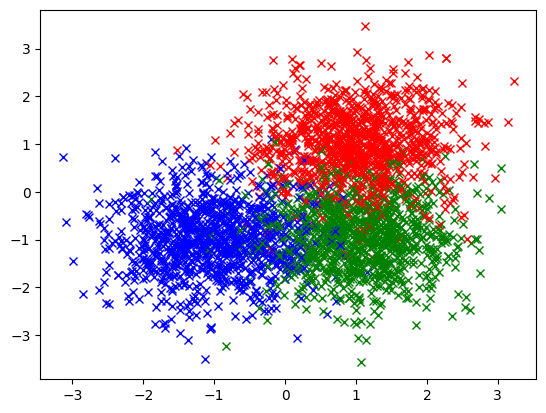

In [46]:
import matplotlib.pyplot as plt

for i in range(len(X)):
    label = labels_true[i]
    if label == 0:
        ticker = "red"
    if label == 1:
        ticker = "blue"
    if label == 2:
        ticker = "green"
    plt.plot(np.array([X[i][0]]),np.array([X[i][1]]),"x",color=ticker)


In [4]:
K = 3

In [6]:
X.shape

(3000, 2)

In [73]:
clusters = [[],[],[]]
centroids = X[np.random.choice(X.shape[0], K)]

In [72]:
np.mean(clusters[0],axis=0)

array([-0.98979258, -1.2253427 ])

In [74]:
from tqdm import tqdm
iterations = 500
for i in tqdm(range(iterations)):
    for query_point in X:
        distances = np.linalg.norm(centroids - query_point, axis=1)
        nearest_neighbor_index = np.argmin(distances)
        clusters[nearest_neighbor_index].append(query_point)

    if i == iterations-1:
        break
    
    for j in range(len(clusters)):
        mean = np.mean(clusters[j],axis=0)
        centroids[j] = mean

    if i%100 == 0:
        print(centroids)
        for i in range(len(clusters)):
            print(i,len(clusters[i]))

    clusters = [[],[],[]]

  1%|          | 5/500 [00:00<00:24, 19.95it/s]

[[ 1.57480296  1.53087211]
 [-0.52953528 -1.22041314]
 [ 0.88968296  0.13767157]]
0 321
1 1344
2 1335


 21%|██        | 104/500 [00:05<00:20, 19.51it/s]

[[ 0.98291197  1.04226313]
 [-1.10234441 -0.992146  ]
 [ 1.04736177 -1.01861101]]
0 1002
1 975
2 1023


 41%|████      | 203/500 [00:09<00:13, 21.31it/s]

[[ 0.98291197  1.04226313]
 [-1.10234441 -0.992146  ]
 [ 1.04736177 -1.01861101]]
0 1002
1 975
2 1023


 61%|██████    | 305/500 [00:14<00:09, 21.64it/s]

[[ 0.98291197  1.04226313]
 [-1.10234441 -0.992146  ]
 [ 1.04736177 -1.01861101]]
0 1002
1 975
2 1023


 81%|████████  | 405/500 [00:19<00:04, 21.06it/s]

[[ 0.98291197  1.04226313]
 [-1.10234441 -0.992146  ]
 [ 1.04736177 -1.01861101]]
0 1002
1 975
2 1023


100%|█████████▉| 499/500 [00:23<00:00, 20.93it/s]


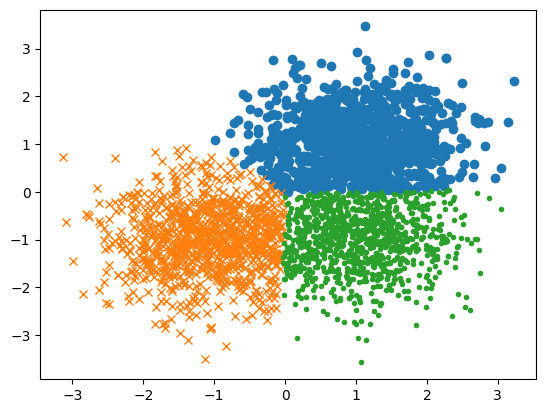

In [75]:
import matplotlib.pyplot as plt

plt.plot(np.array(clusters[0])[:,0],np.array(clusters[0])[:,1],"o")
plt.plot(np.array(clusters[1])[:,0],np.array(clusters[1])[:,1],"x")
plt.plot(np.array(clusters[2])[:,0],np.array(clusters[2])[:,1],".")
